In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [8]:
import seaborn as sns

<Axes: xlabel='Outcome', ylabel='count'>

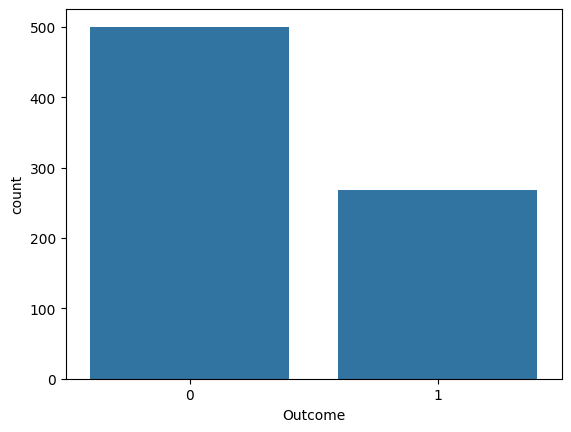

In [9]:
sns.countplot(x=y)

In [11]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y ,random_state=42)

In [19]:
x.shape

(768, 8)

In [20]:
x_train.shape

(576, 8)

In [21]:
x_test.shape

(192, 8)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [24]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [25]:
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [26]:
y_pred = knn.predict(x_test)


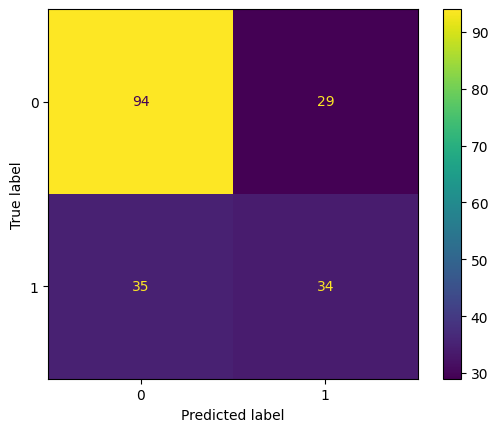

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       123
           1       0.54      0.49      0.52        69

    accuracy                           0.67       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.66      0.67      0.66       192



In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
error = []
for k in range (1,41): 
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(x_train, y_train) 
    pred=knn.predict(x_test) 
    error.append(np.mean(pred!=y_test))


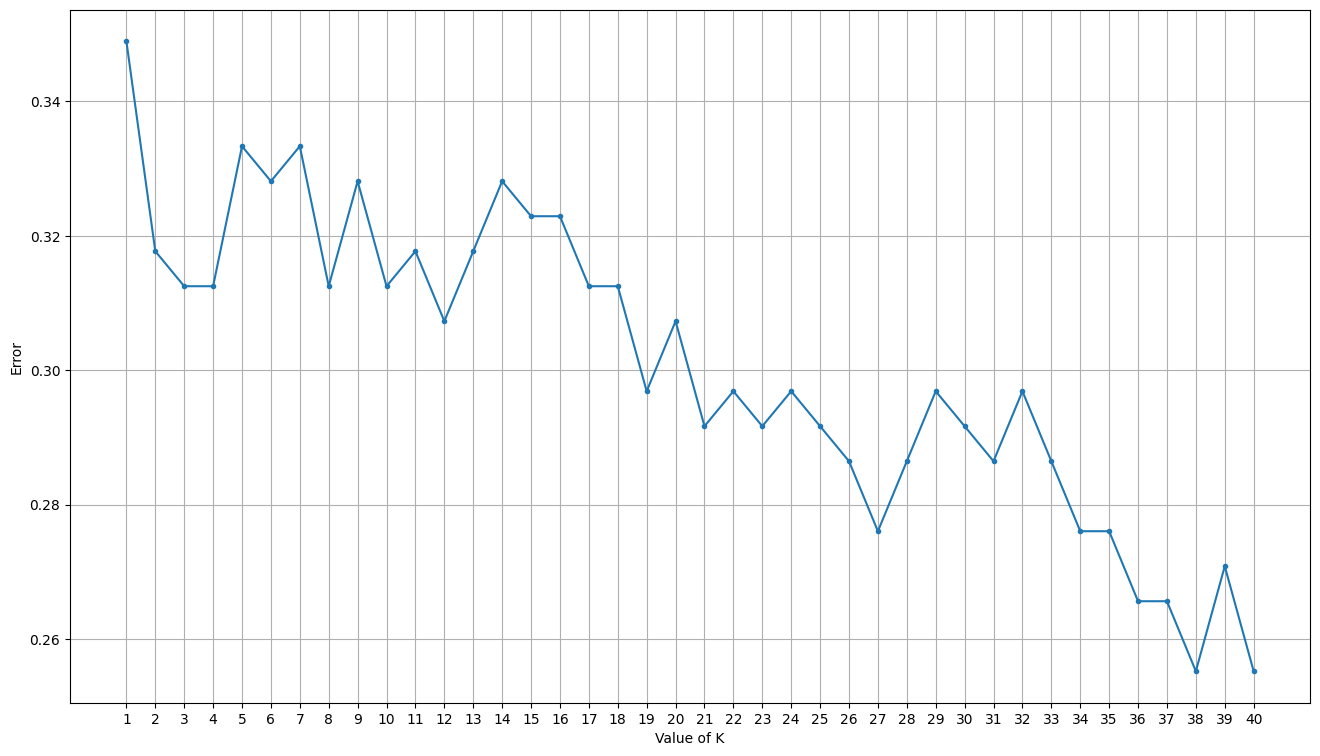

In [31]:
plt.figure(figsize=(16,9))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error,marker='.')


In [32]:
knn = KNeighborsClassifier(n_neighbors = 33) 

In [33]:
knn.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=33)

In [34]:
y_pred=knn.predict(x_test) 

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       123
           1       0.63      0.49      0.55        69

    accuracy                           0.71       192
   macro avg       0.69      0.67      0.67       192
weighted avg       0.70      0.71      0.70       192

